# Plotting the Energy Deposited in the Detector

The detector is an 8x8 grid of channels with channel 1 in the top left corner and channel 8 in the top right corner

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np, os, pandas as pd
from glob import glob
import os
from my_classes import *
import scipy
import numpy as np
import plotly.graph_objects as go

In [14]:
energy_dict = load_data_ohio()
x, y, z = create_3d_cords()

In [2]:
grant = load_gate_data_by_angle()

In [5]:
files = sorted(glob('gate_data/bars/*'))

## Plotting all angles of one beam size in one figure

This section gets fed the data generated by Gate and makes a bounch of svgs. For each beam size, it plots all of the accompanying angles together in the one plot with the tiles being the name of the file the data was pulled from.

In [13]:
%matplotlib inline
cmap = cm.get_cmap('plasma')
#data = grant['W05_H05']
#norm = Normalize(vmin=min(data), vmax=max(data)) # Defines color range for the specific bar chart

for beam_size, edep_angle in grant.items():
    fig, axes = plt.subplots(nrows=5, ncols=7, figsize=(30, 30), constrained_layout=True, subplot_kw=dict(projection='3d'))
    axes = axes.flatten()

    for (filename, edep), axis in zip(edep_angle.items(), axes):
        norm = Normalize(vmin=min(edep), vmax=max(edep)) # Defines color range for the specific bar chart
        axis.bar3d(*bar_chart_helper(edep), color=cmap(norm(edep)))
        axis.set_title(filename)
    fig.savefig(f'figures/gate_data_figures/plots_of_bars/{beam_size}.svg', facecolor='white')
    plt.close(fig)

***

## Plots each simulation in its own figure

This part loops through each extracted file and makes a plot of that individual Gate run. The name of the file is the extracted filename.

In [29]:
%matplotlib inline
cmap = cm.get_cmap('plasma')

for beam_size, edep_angle in grant.items():
    for filename, angle_data in edep_angle.items():
        #print(filename)
        norm = Normalize(vmin=min(angle_data), vmax=max(angle_data))
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.bar3d(*bar_chart_helper(angle_data), color=cmap(norm(angle_data)))
        ax.set_title(filename)
        fig.savefig(f"figures/gate_data_figures/plots_of_individual_runs/{filename.rstrip('.txt')}.svg", facecolor='white')
        plt.close(fig)

## Depth Dose of Cubes

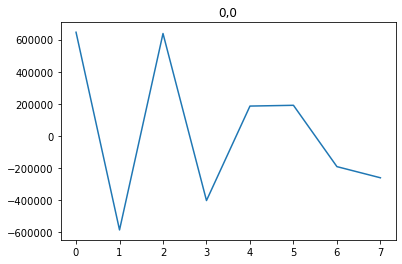

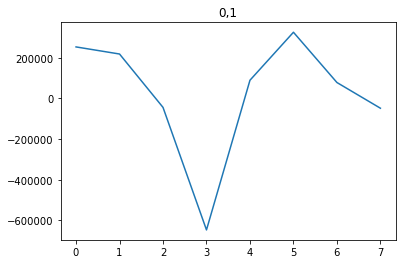

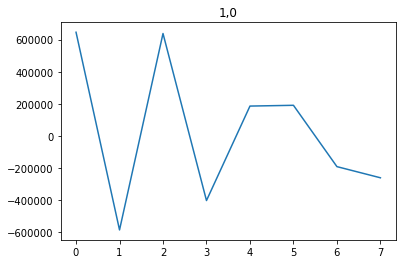

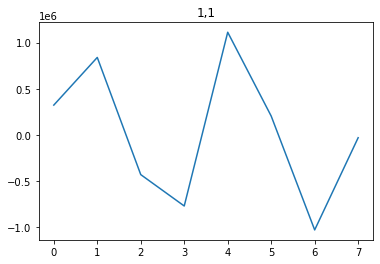

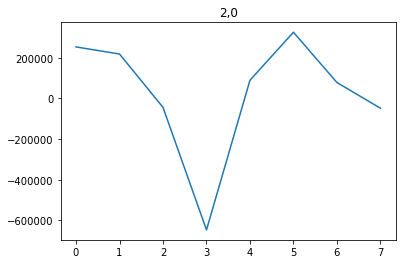

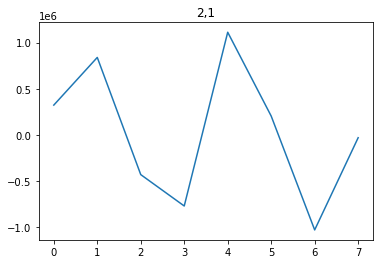

In [54]:
dataarray = np.loadtxt('neural_nets/JuliaOutputs/Run019/fullOhioOutputs/OhioOutput21.txt')
datacube = dataarray.reshape((8,8,8))

for x in range(0,3):
    for y in range(0,2):
        #print(datacube.shape)
        array=datacube.sum(axis=x).sum(axis=y)
        plt.figure()
        plt.title(f'{x},{y}')
        plt.plot(array)

In [20]:
dataarray.reshape((8,8,8)).sum(axis=0).sum(axis=0)

array([ 477529., -448204.,  581097., -385552.,  159338.,   71450.,
       -187849.,  -91417.])

In [33]:
grant = np.ones((3, 4, 5))

In [36]:
grant

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [39]:
grant.sum(axis=0).sum(axis=0)

array([12., 12., 12., 12., 12.])

***

## Figure of All Ohio Runs

In [ ]:
%matplotlib inline

# Gets the colormap plasma
cmap = cm.get_cmap('plasma')

fig = plt.figure(figsize=(30, 30))
for key, index in zip(sorted(energy_dict, reverse=True), range(len(energy_dict))):
    data = energy_dict[key]
    norm = Normalize(vmin=min(data), vmax=max(data)) # Defines color range for the specific bar chart
    ax = fig.add_subplot(7, 6, 1 + index, projection='3d')
    if 'r' in key:
        # Rotated
        ax.bar3d(*bar_chart_helper_rot(data), color=cmap(norm(data)))
        ax.set_title(key)
        ax.set_zlabel('Channel 8s')
        ax.set_ylabel('Channel 1s')
        ax.set_xticks([])
        ax.set_yticks(list(range(1, 9)))
        ax.set_zticks(list(range(1, 9)))
        ax.set_zticklabels(reversed(list(range(8, 65, 8))))
        ax.set_yticklabels(list(range(1, 9)))
        ax.tick_params(axis='both', which='major', labelsize=6)
    else:
        ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data))) # Plots the barchart with the colors of each bar defined from the normalization
        ax.set_title(key)
        ax.set_xlabel('Channel 8s')
        ax.set_ylabel('Channel 1s')
        ax.set_zticks([])
        ax.set_xticks(list(range(1, 9)))
        ax.set_xticklabels(list(range(1,64, 8)))
        ax.set_yticks(list(range(1, 9)))#, labels=list(range(8, 65, 8)))
        #ax.set_yticklabels(reversed(list(range(8, 65, 8))))
        ax.tick_params(axis='both', which='major', labelsize=6)


fig.savefig('figures/ohio_data_figures/figure_of_all_ohio_runs.png', dpi=500, facecolor='white')

***

## Creating Side-by-side Figures

In [ ]:
%matplotlib inline

cmap = cm.get_cmap('plasma')

keys = list(energy_dict.keys())

for index, (normal, rotated) in enumerate(zip(keys[0::2], keys[1::2])): # I want pairs of dictionary keys so make side-by-side graphs
    fig = plt.figure()
    fig.suptitle(f'Side by side of run {index+1}')

    # Non-Rotated
    data = energy_dict[normal]
    norm = Normalize(vmin=min(data), vmax=max(data)) # Defines the color map for the specific bar chart
    ax = fig.add_subplot(122, projection='3d')

    ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data))) # Plots the barchart with the colors of each bar defined from the normalization
    ax.set_title(normal)
    ax.set_xlabel('Channel 8s')
    ax.set_ylabel('Channel 1s')
    ax.set_zticks([])
    ax.set_xticks(list(range(1, 9)))
    ax.set_xticklabels(list(range(1,64, 8)))
    ax.set_yticks(list(range(1, 9)))#, labels=list(range(8, 65, 8)))
    ax.tick_params(axis='both', which='major', labelsize=6)


    # Rotated
    data = energy_dict[rotated]
    norm = Normalize(vmin=min(data), vmax=max(data)) # Defines the color map for the specific bar chart
    ax = fig.add_subplot(121, projection='3d')

    ax.bar3d(*bar_chart_helper_rot(data), color=cmap(norm(data)))
    ax.set_title(rotated)
    ax.set_zlabel('Channel 8s')
    ax.set_ylabel('Channel 1s')
    ax.set_xticks([])
    ax.set_yticks(list(range(1, 9)))
    ax.set_zticks(list(range(1, 9)))
    ax.set_zticklabels(reversed(list(range(8, 65, 8))))
    ax.set_yticklabels(list(range(1, 9)))
    ax.tick_params(axis='both', which='major', labelsize=6)


    fig.savefig(f'figures/ohio_data_figures/run_{str(index+1).zfill(2)}_sidebyside.png', dpi=500, facecolor='white')
    plt.close(fig)

***

## Viewing Julia Results

Ugur wants a dose depth graphs like what was made in google sheets. It consists of summing each plane of cubes the beam passes perpendicular to. Since the data is already shaped in a 64x8 and can be loaded into numpy this will be fairly easy. I'm not sure though on the julia output data which plane is in which orientation.

- Since the data is a cube that has been unstacked layer by layer, the columns of the (64x8) array text file correspond to the same plane slice, I don't need to reshape to 3D.

***

## Verification Code for the Ordering of the Channels

```python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib widget

channels = np.ones(64)
channels[:5] = 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(*bar_chart_helper(channels), shade=True)
ax.set_xlabel('Channel 1s')
ax.set_ylabel('Channel 8s')
fig.show()
```

***

## General 3D Scatter Plot Code

- Note:
    - If the data being plotted is the rotated data the cube of data must also be rotated
    - Here is what I was using:    
    - ```python
    data = np.rot90(reshape_extend(energy_dict['R03_r.txt']), axes=(0, 2))```

```python
x, y, z = create_3d_cords()

fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, c=reshape_extend(energy_dict['R03.txt']), s=calculate_sizes(reshape_extend(energy_dict['R03.txt'])))
ax.set_xlabel('x axis')
ax.set_ylabel('Beam Enters from this side')
ax.set_title('R03.txt')
#plt.close(fig)
```

***

# Generic 3D Bar Chart

```python
%matplotlib inline
cmap = cm.get_cmap('plasma')
data = bar_energies['totEDBars_10_15_extracted.txt']
norm = Normalize(vmin=min(data), vmax=max(data)) # Defines color range for the specific bar chart

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data)))
```